In [31]:
pip install Yfinance

Note: you may need to restart the kernel to use updated packages.


In [32]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import yfinance as yf 

In [33]:
start = '2012-01-01'
end = '2023-12-21'
stock = 'GC=F'

data = yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [34]:
data.reset_index(inplace=True)

In [35]:
 data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,1568.900024,1604.300049,1566.000000,1599.699951,1599.699951,229
1,2012-01-04,1596.599976,1618.599976,1594.500000,1611.900024,1611.900024,172
2,2012-01-05,1610.800049,1624.099976,1597.800049,1619.400024,1619.400024,362
3,2012-01-06,1622.500000,1627.800049,1616.099976,1616.099976,1616.099976,20
4,2012-01-09,1614.300049,1620.099976,1607.500000,1607.500000,1607.500000,8
...,...,...,...,...,...,...,...
3005,2023-12-14,2024.699951,2040.099976,2024.300049,2030.199951,2030.199951,236
3006,2023-12-15,2032.599976,2043.400024,2018.300049,2021.099976,2021.099976,261
3007,2023-12-18,2024.300049,2032.800049,2024.000000,2026.300049,2026.300049,100
3008,2023-12-19,2025.199951,2042.699951,2025.199951,2038.400024,2038.400024,498


In [36]:
ma_100_days = data.Close.rolling(100).mean()

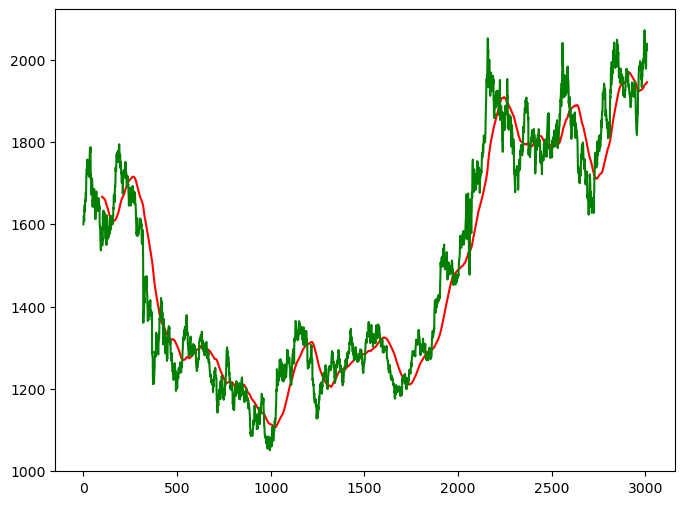

In [37]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [38]:
ma_200_days = data.Close.rolling(200).mean()

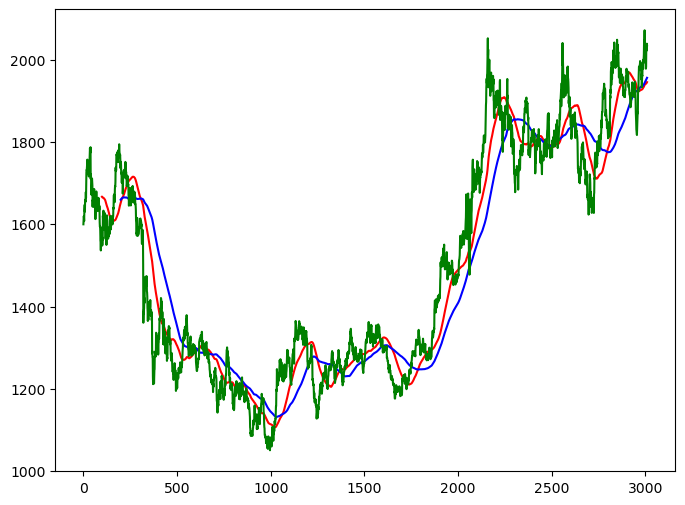

In [39]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [40]:
data.dropna(inplace=True)

In [41]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [42]:
data_train.shape[0]

2408

In [43]:
data_test.shape[0]

602

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [45]:
data_train_scale = scaler.fit_transform(data_train)

In [46]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [47]:
x, y = np.array(x), np.array(y)

In [48]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [49]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [50]:
model = Sequential ()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, 
                input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60,activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [51]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [52]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 44s 284ms/step - loss: 0.0614
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 21s 291ms/step - loss: 0.0086
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 21s 282ms/step - loss: 0.0074
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 20s 275ms/step - loss: 0.0069
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 20s 278ms/step - loss: 0.0062
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 20s 274ms/step - loss: 0.0066
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 20s 273ms/step - loss: 0.0052
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 20s 275ms/step - loss: 0.0047
Epoch 9/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 20s 276ms/step - loss: 0.0047
Epoch 10/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 20s 274ms/step - loss: 0.0046
Epoch 11/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 29s 397ms/step - loss: 0.0041
Epoch 12/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 27s 374ms/step - loss: 0.0039
Epoch 13/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 28s 384ms/step - loss: 0.0046
Epoch 14/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 28s 379ms/step - loss: 0.0035
Epoch 15/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 27s 

In [53]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_12 (LSTM)                       │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [54]:
pas_100_days = data_train.tail(100)

In [55]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [57]:
data_test_scale = scaler.fit_transform(data_test)

In [59]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)


In [60]:
y_predict = model.predict(x)

19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 326ms/step


In [64]:
scale =1/scaler.scale_

In [65]:
y_predict = y_predict*scale

In [66]:
y = y*scale

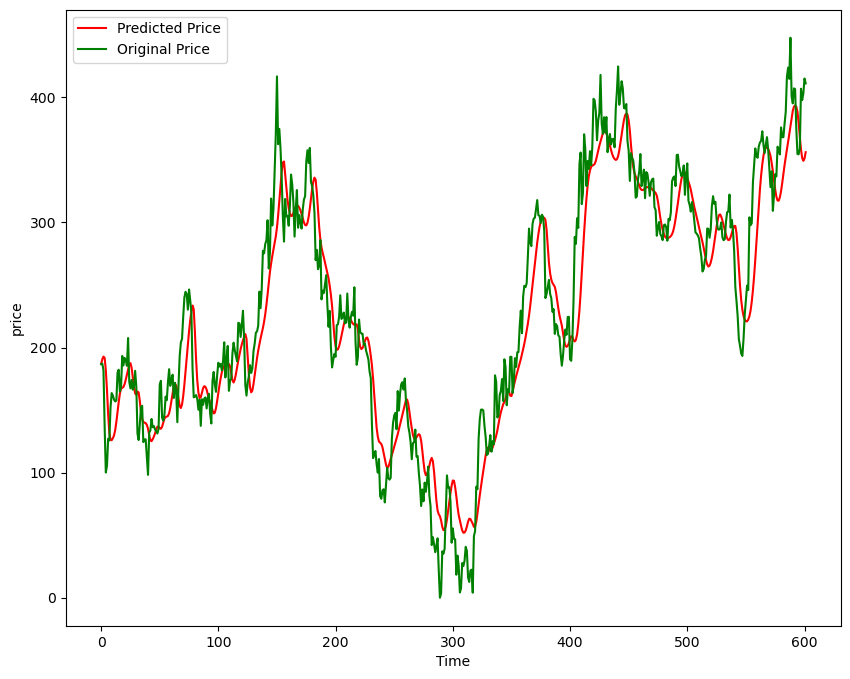

In [68]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r', label = 'Predicted Price')
plt.plot(y, 'g',label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('price')
plt.legend()
plt.show()

In [69]:
model.save('Stock Predications Model.keras')